# Reading Data as Strings

In [227]:
import requests
import json
from contextlib import closing
# make base URL and dictionary of get request key/values
url = "https://content.guardianapis.com/search"
payload = {'api-key': "6ff8fcd2-050d-4801-a29f-848c8b750b6e", 'q':'brexit', 'show-blocks':'body', 
           'page-size': 50, 'show-tags': 'contributor'} # key/values for get request (look up in api, there are lots)

# Perform the actual request
with closing(requests.get(url,params=payload)) as r:
    articles = r.json()
#     print(articles)
summaries = [x['blocks']['body'][0]['bodyTextSummary'] for x in articles['response']['results'] if x['tags']]
# print(summaries)
# summaries = [x['blocks']['body'][0]['bodyTextSummary'] for x in articles['response']['results']]
# print(len(summaries))
# # print(len([word for document in summaries for word in summaries[0].split()]))
words = [word for document in summaries for word in document.split()]
print(words)
print(len(words))

['European', 'Union', 'exit', 'and', 'trade', '(European', 'affairs)', 'sub-committee', 'PM', 'I', 'went', 'to', 'Brussels.', 'Met', 'the', 'EU', 'leaders.', 'They', 'wanted', 'to', 'know', 'our', 'plan.', 'I', 'had', 'nothing', 'to', 'tell', 'them.', 'Foreign', 'secretary', 'Rome', 'wasn’t', 'built', 'in', 'a', 'day.', 'PM', 'We', 'need', 'a', 'plan.', 'The', 'EU', 'wants', 'to', 'know', 'the', 'plan.', 'Parliament', 'wants', 'to', 'know', 'the', 'plan.', 'It', 'has', 'been', 'four', 'frigging', 'months!', 'No', 'plan!', 'I’m', 'beginning', 'to', 'wonder', 'if', 'this', 'will', 'be', 'over', 'in', 'my', 'lifetime.', 'Foreign', 'secretary', 'Probably', 'not.', 'How', 'old', 'are', 'you,', 'actually?', 'PM', 'You', 'three', 'ran', 'the', 'leave', 'campaign.', 'I', 'assumed', 'you', 'had', 'some', 'idea', 'what', 'to', 'do.', 'Foreign', 'secretary', 'Nope.', 'Trade', 'minister', 'The', 'Great', 'Repeal', 'bill', 'will', 'solve', 'the', 'problem.', 'PM', 'No.', 'EU-related', 'law', 'const

In [228]:
doc_lengths = []
for document in summaries:
    length = 0
    for word in document.split():
        length += 1
    doc_lengths.append(length)


In [229]:
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline 

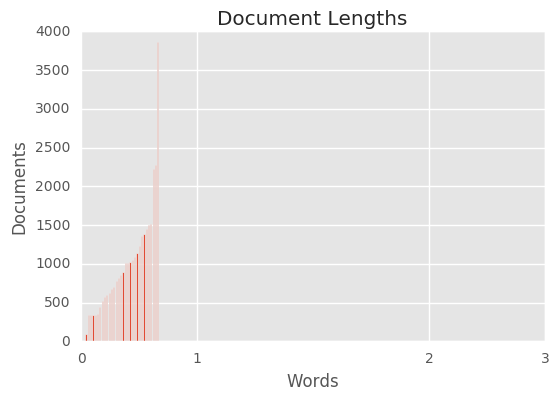

In [230]:
import pandas as pd
doc_lengths.sort()
df = pd.DataFrame({'Lengths': doc_lengths})
plt.style.use('ggplot')
labels = [0,50,150,200]
ax = df.plot(kind="bar",legend=False, title="Document Lengths")
plt.xticks(labels,fontsize=10,rotation=360)
ax.set(xlabel="Words",ylabel="Documents")
plt.show()

#ax.set_yticklabels(list(range(0,50)))

# Verifying Data Quality, Bag of Words, and TF-IDF Representations

In [231]:
# combined stop words from scikit-Learn's original source and 2 others, for 617 stop words
# https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/feature_extraction/stop_words.py
# https://sites.google.com/site/kevinbouge/stopwords-lists
# http://algs4.cs.princeton.edu/35applications/stopwords.txt
with open("combined_stop_words.txt") as textfile:
    stopwords = textfile.readlines()
    stopwords = [word.strip() for word in stopwords]

#### We removed stop words, random numbers, and mixed strings. We chose to not remove years because they are relevant information for our analyses.

In [232]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(stop_words=stopwords)
# count_vect = CountVectorizer(stop_words=stopwords,
#                               max_df=0.01,
#                               min_df=4)
bag = count_vect.fit_transform(summaries)
pd.options.display.max_columns = 999
df = pd.DataFrame(data=bag.toarray(),columns=count_vect.get_feature_names())
for column in list(df):
    if any(char.isdigit() for char in column):
        if column.isdigit():
            if (int(column) > 1900):
                random = []
            else:
                df = df.drop(column, 1)
        else:
            df = df.drop(column, 1)
df

1917  1918  1933  1936  1939  1957  1963  1966  1972  1974  1978  1989  \
0      0     0     0     0     0     0     0     0     0     0     0     0   
1      0     0     0     0     0     0     0     0     0     0     0     0   
2      0     0     0     0     0     0     0     0     0     0     0     0   
3      0     0     0     0     0     0     0     0     0     0     0     0   
4      0     0     0     0     0     0     0     0     0     0     0     0   
5      0     0     0     0     0     0     0     0     0     0     0     0   
6      0     0     0     0     0     0     0     0     0     0     0     0   
7      0     0     0     0     0     0     0     0     0     0     0     0   
8      0     0     0     0     0     0     0     0     1     0     0     0   
9      0     0     0     0     0     0     0     0     0     0     0     0   
10     0     0     2     1     0     0     1     0     0     0     0     0   
11     0     0     0     0     0     0     0     0     0     0     0     0   
12     0     0     0     0     0     0     0     0     0     0     0     0   
13     0     0     0     0     0     0     0     0     0     0     0     0   
14     0     0     0     0     0     0     0     0     0     0     0     0   
15     0     0     0     0     0     0     0     0     0     0     0     0   
16     0     0     0     0     0     0     0     0     0     0     0     0   
17     0     0     0     0     0     0     0     0     0     0     0     0   
18     0     0     0     0     0     0     0     0     0     0     0     0   
19     0     0     0     0     1     0     0     0     3     0     0     0   
20     0     0     0     0     0     0     0     0     0     0     0     0   
21     0     0     0     0     0     0     0     0     0     0     0     0   
22     0     0     0     0     0     0     0     0     0     0     0     0   
23     0     0     0     0     0     0     0     0     0     0     0     0   
24     0     0     0     0     0     1     0     0     0     0     0     2   
25     0     0     0     0     0     0     0     0     0     0     0     0   
26     0     0     0     0     0     0     0     0     0     0     0     0   
27     0     0     0     0     0     0     0     0     0     0     0     0   
28     0     0     0     0     0     0     0     0     0     0     0     0   
29     0     0     0     0     0     0     0     0     0     0     0     0   
30     0     0     0     0     0     0     0     0     0     0     0     0   
31     0     0     0     0     0     0     0     0     0     0     0     0   
32     1     0     0     0     0     0     1     1     1     1     1     0   
33     0     1     0     0     0     0     0     0     0     0     0     0   

    1992  1997  1998  2002  2004  2007  2008  2009  2010  2011  2013  2014  \
0      0     0     0     0     0     0     0     0     0     0     0     0   
1      0     0     0     0     0     0     0     0     0     0     0     0   
2      0     0     0     0     0     0     0     0     0     0     0     0   
3      0     0     0     0     0     0     0     0     0     0     0     0   
4      0     0     0     0     0     0     0     0     0     0     1     0   
5      0     0     0     0     0     0     0     0     0     0     0     0   
6      0     0     0     0     0     0     0     0     0     0     0     0   
7      0     0     0     0     0     0     0     0     0     0     0     0   
8      0     0     0     0     0     0     0     0     0     0     0     0   
9      0     0     0     1     0     1     0     0     0     1     0     0   
10     2     0     0     0     0     0     0     0     0     0     0     0   
11     0     0     0     0     0     0     0     0     0     0     0     1   
12     0     0     0     0     0     0     0     0     0     0     0     0   
13     0     0     0     0     0     0     1     1     0     0     1     0   
14     0     0     0     0     0     0     0     0     0     0     0     0   
15     0     0     0     

 # Visualizing Statistical Summaries of Text Data and Target Classes

[<matplotlib.text.Text at 0x121278828>, <matplotlib.text.Text at 0x121244ba8>]

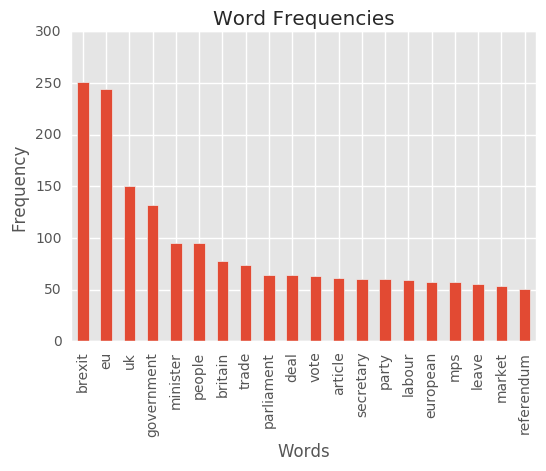

In [233]:
frequencies = df.sum()
frequencies.sort_values(inplace=True)
largest = frequencies.nlargest(20)
ax = largest.plot(kind = "bar",title="Word Frequencies")
ax.set(xlabel="Words",ylabel="Frequency")



/Users/rupalsanghavi/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


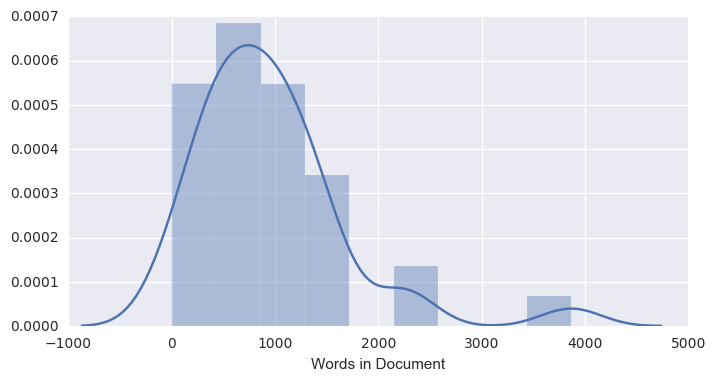

In [234]:
df = pd.DataFrame({'Lengths': doc_lengths})
import seaborn as sns
cmap = sns.diverging_palette(220, 10, as_cmap=True) # one of the many color mappings
sns.set(rc={"figure.figsize": (8, 4)}); np.random.seed(0)

sns.distplot(df.Lengths.values, axlabel="Words in Document")

This diagram shows that the majority of the documents in this dataset have approximately 800 words and that the lengths values have a slight right skewedness.

As Brexit was one of the query terms, it expectedly appears among the most frequent words, almost as often as the EU, thought after, which the frequencies fall to almost half as much.

In [235]:
url = "https://content.guardianapis.com/search"
payload = {'api-key': "6ff8fcd2-050d-4801-a29f-848c8b750b6e", 'q':'brexit', 'show-blocks':'body', 
           'page-size': 200, 'show-tags': 'contributor' } # key/values for get request (look up in api, there are lots)

In [236]:
with closing(requests.get(url,params=payload)) as r:
    articles = r.json()
#     print(articles)
summaries = [x['sectionId'] for x in articles['response']['results']]

words = [word for document in summaries for word in document.split()]
words_no_dup = list(set(words))


{'response': {'userTier': 'developer', 'currentPage': 1, 'pages': 60, 'status': 'ok', 'results': [{'isHosted': False, 'webTitle': 'Brexit means Brexit: independence! Sovereignty! Freedom! Recession! ', 'type': 'article', 'blocks': {'totalBodyBlocks': 1, 'body': [{'contributors': [], 'lastModifiedDate': '2016-10-24T15:24:42Z', 'createdDate': '2016-10-24T12:06:25Z', 'id': 'b99e8465-e722-4aa2-a487-a7282e0acebe', 'attributes': {}, 'published': True, 'bodyTextSummary': 'European Union exit and trade (European affairs) sub-committee PM I went to Brussels. Met the EU leaders. They wanted to know our plan. I had nothing to tell them. Foreign secretary Rome wasn’t built in a day. PM We need a plan. The EU wants to know the plan. Parliament wants to know the plan. It has been four frigging months! No plan! I’m beginning to wonder if this will be over in my lifetime. Foreign secretary Probably not. How old are you, actually? PM You three ran the leave campaign. I assumed you had some idea what to

In [237]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

tfidf_vect = TfidfVectorizer(stop_words=stopwords)

tfidf_mat = tfidf_vect.fit_transform(summaries) 
# convert to pandas to get better idea about the data
df = pd.DataFrame(data=tfidf_mat.toarray(),columns=tfidf_vect.get_feature_names())

In [238]:
most_common_rel_words = df.sum()

In [239]:
df = pd.DataFrame({'Section IDs': words})
df_grouped = df.groupby(by='Section IDs')


['info', 'technology', 'business', 'voluntary-sector-network', 'money', 'higher-education-network', 'fashion', 'commentisfree', 'books', 'stage', 'media-network', 'tv-and-radio', 'membership', 'media', 'us-news', 'news', 'education', 'artanddesign', 'lifeandstyle', 'environment', 'uk-news', 'world', 'law', 'small-business-network', 'society', 'politics', 'suez-circular-economy-zone', 'global']
Count :1


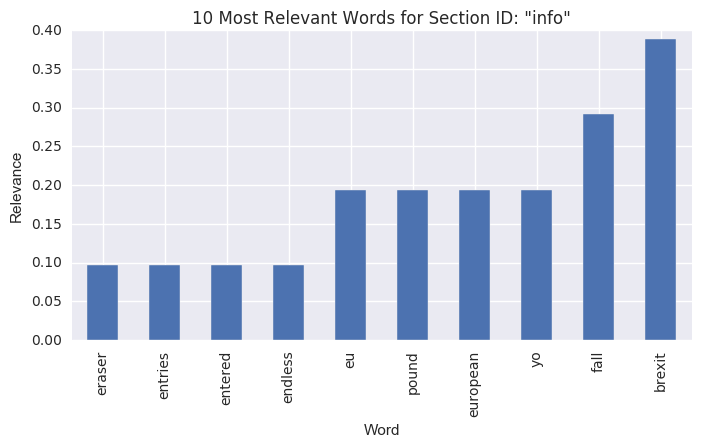

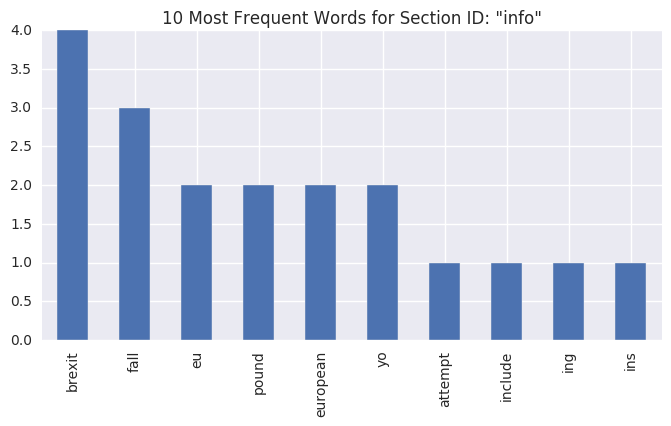

Count :1


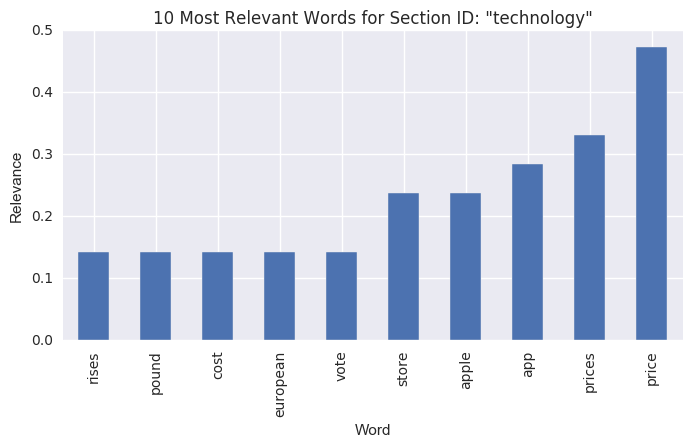

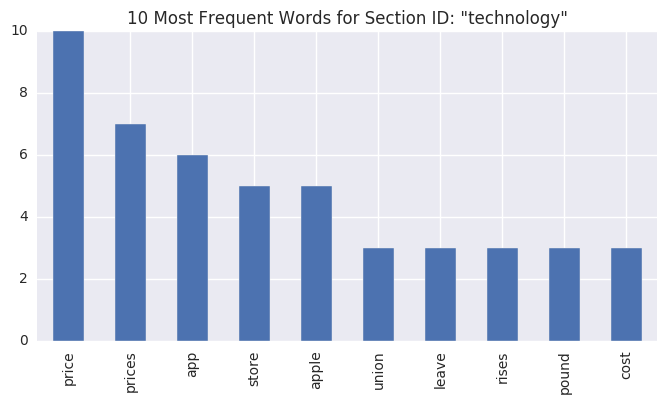

Count :23


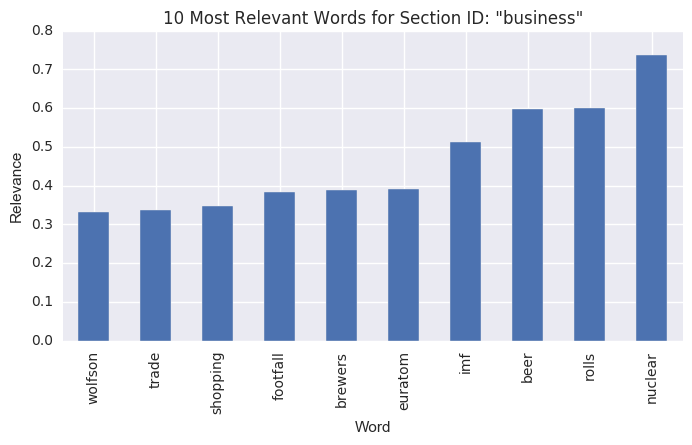

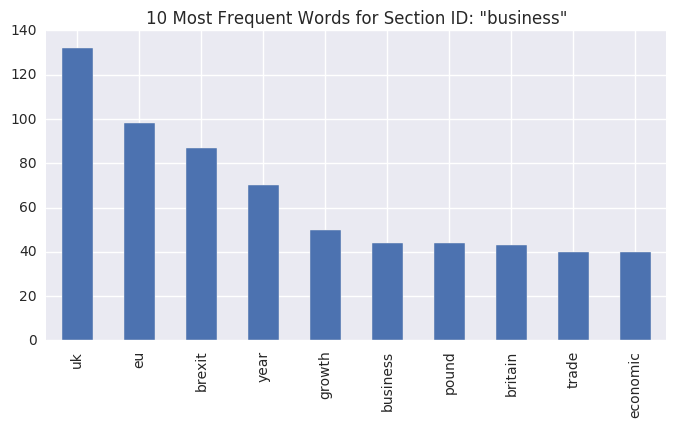

Count :2


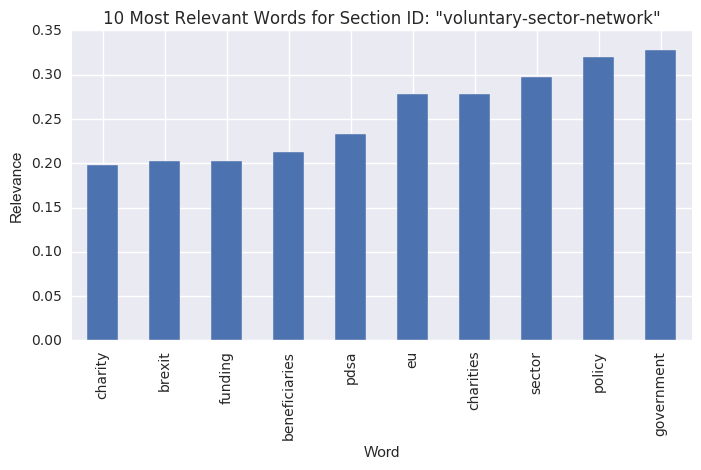

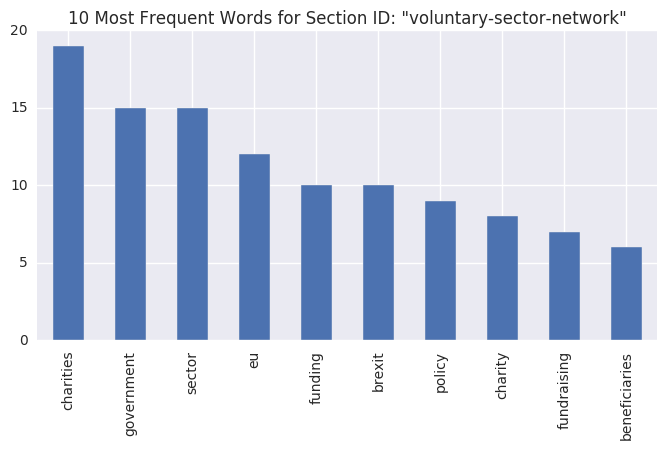

Count :1


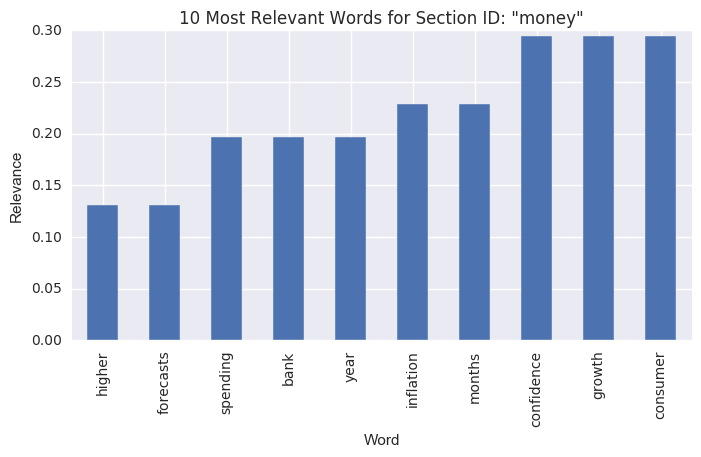

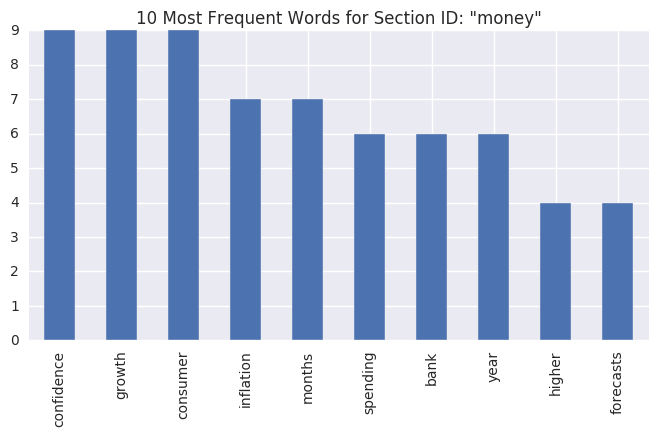

Count :1


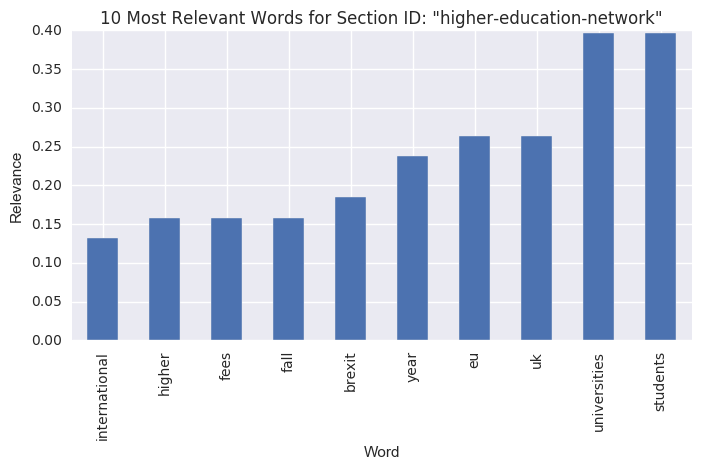

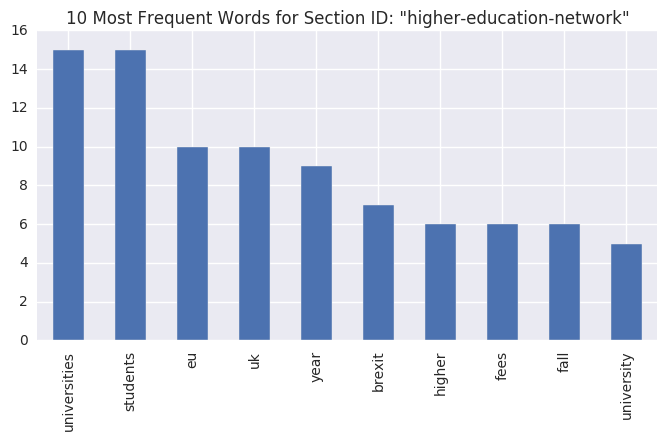

Count :1


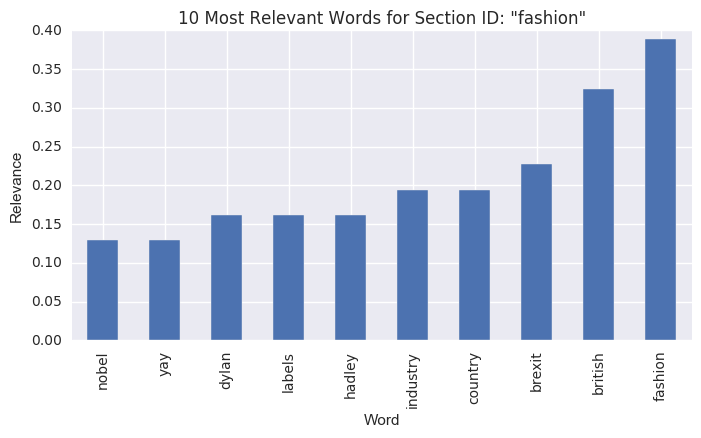

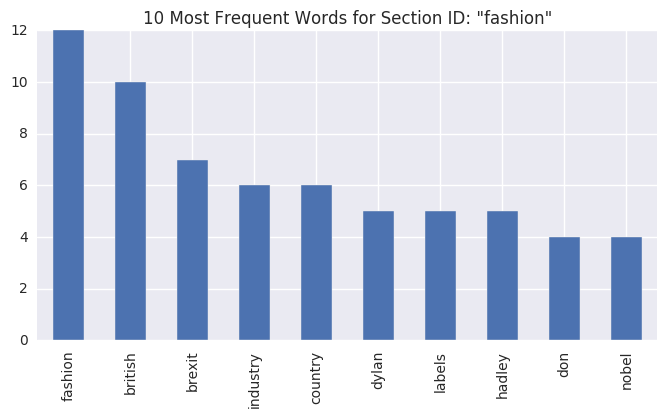

Count :23


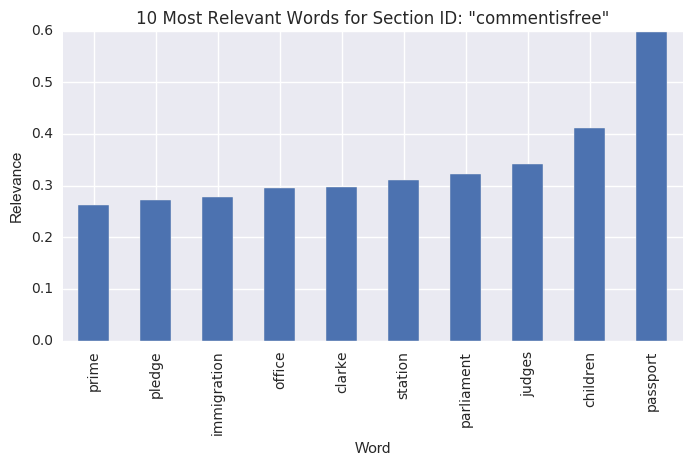

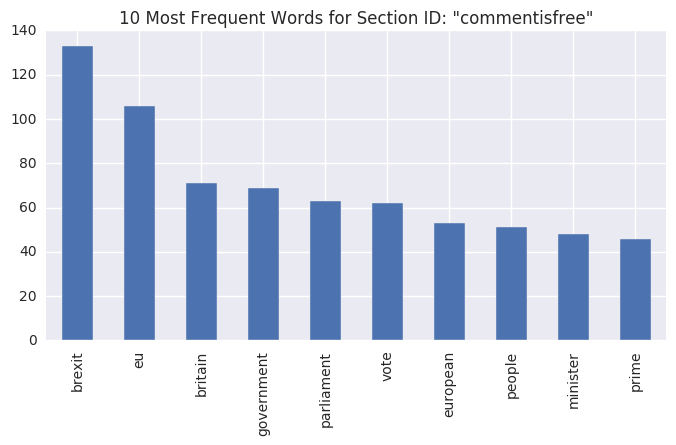

Count :2


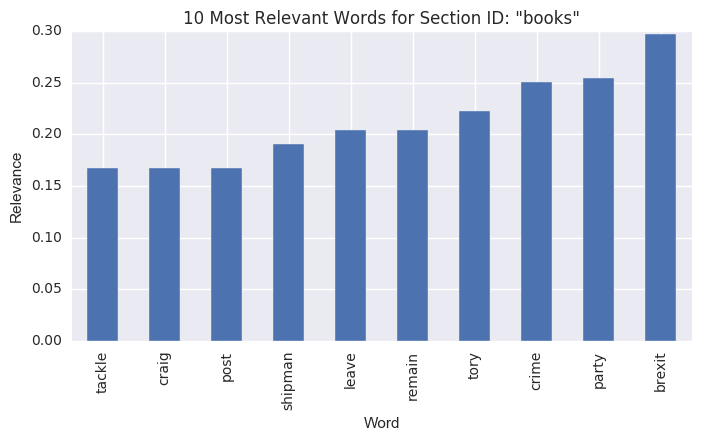

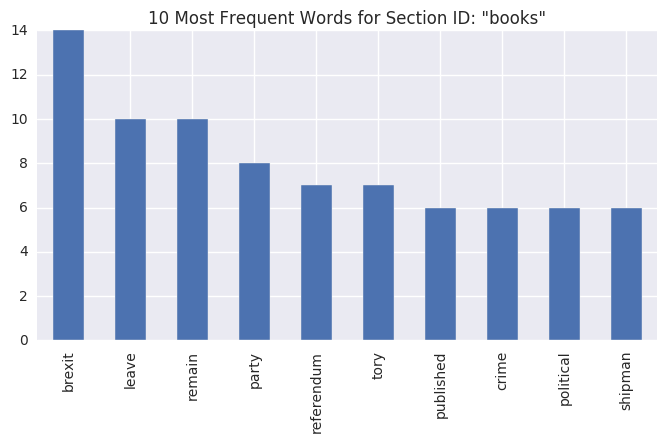

Count :2


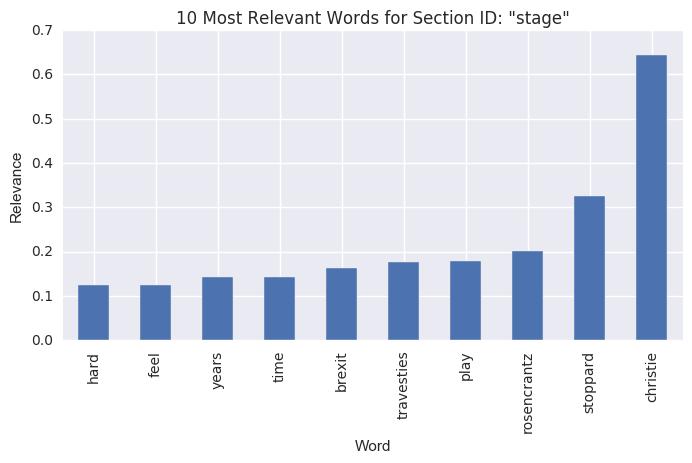

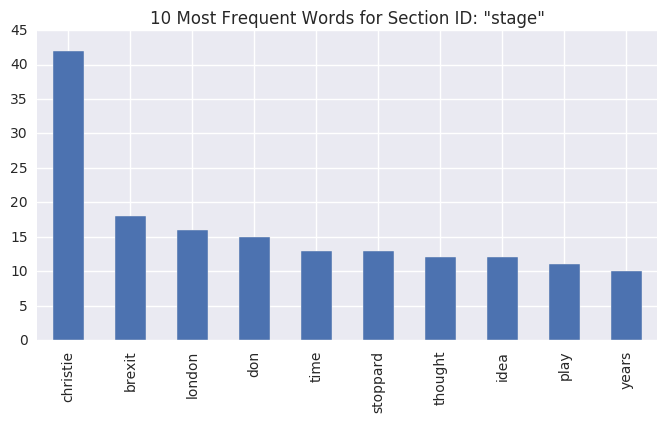

Count :1


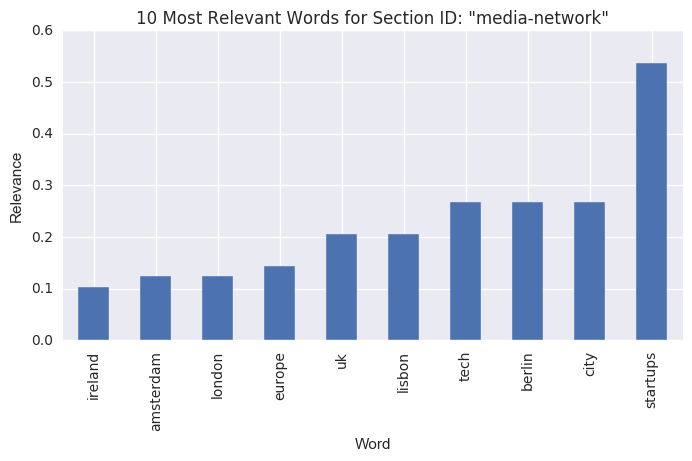

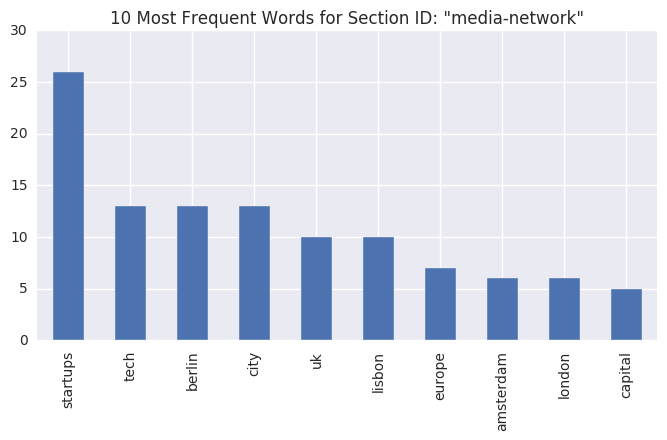

Count :1


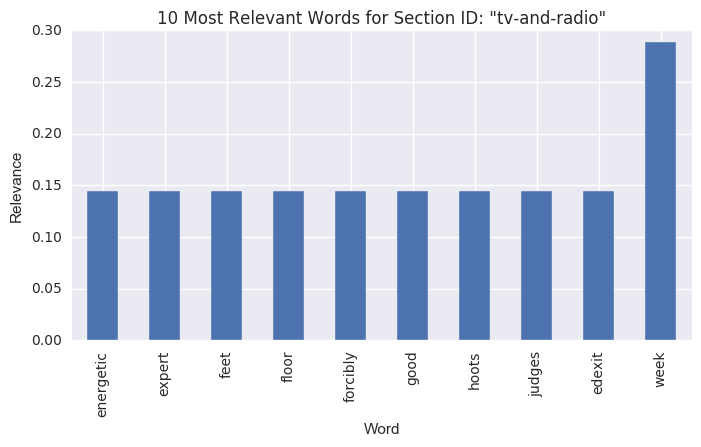

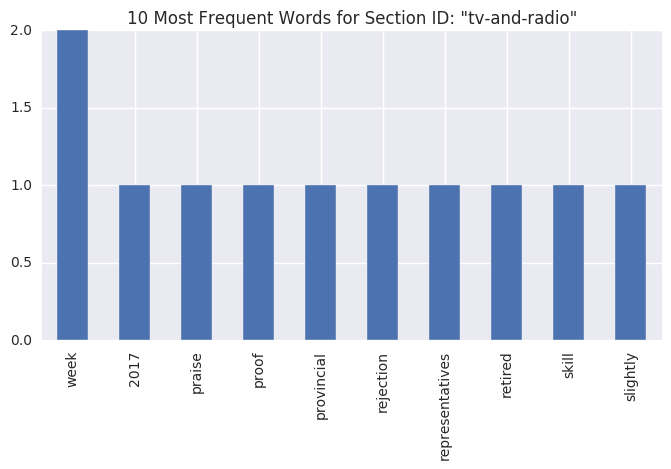

Count :1


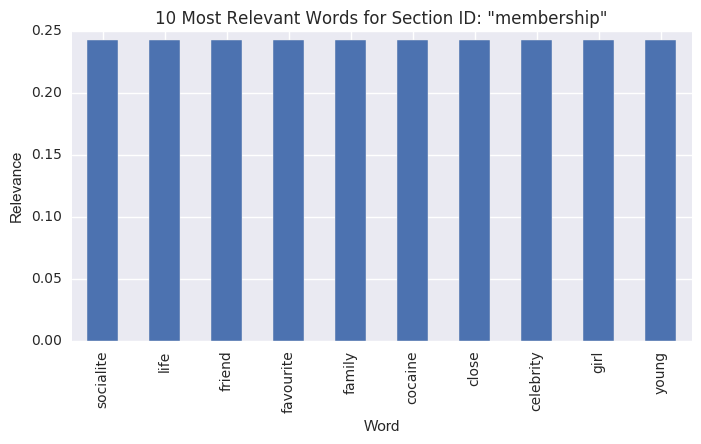

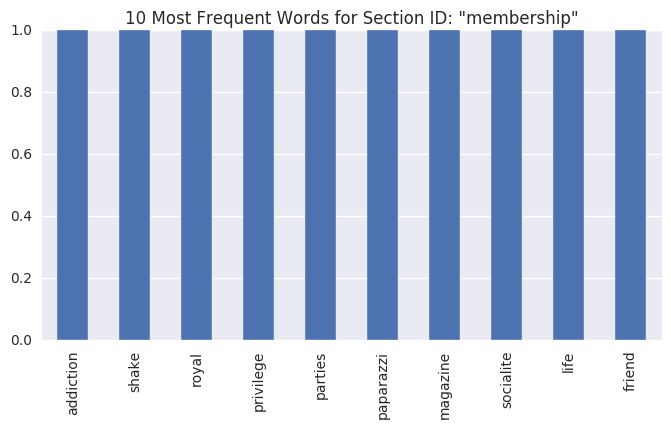

Count :3


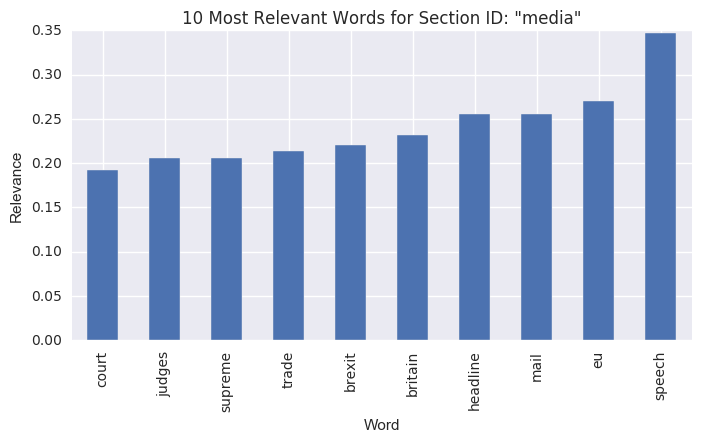

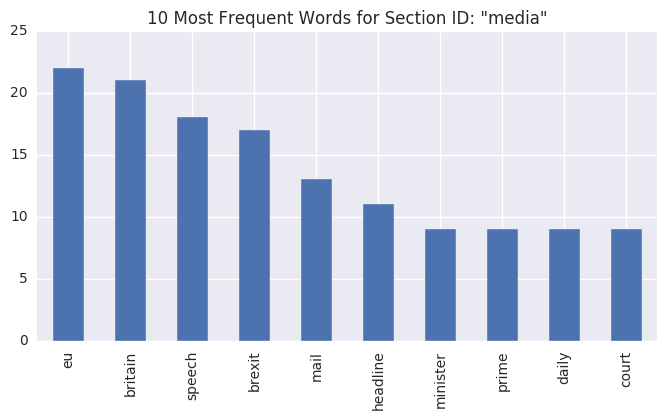

Count :3


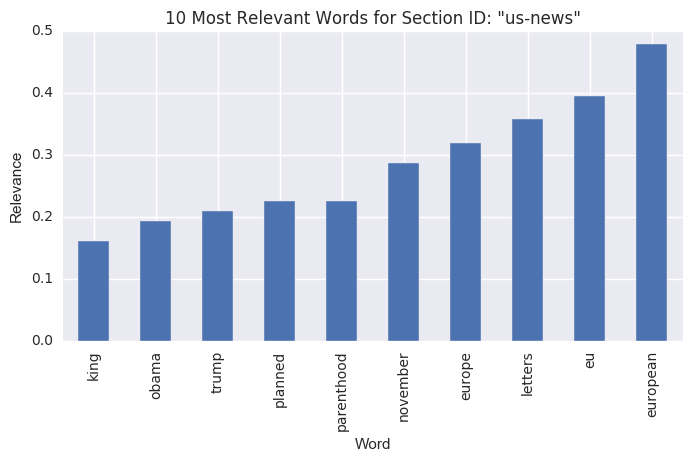

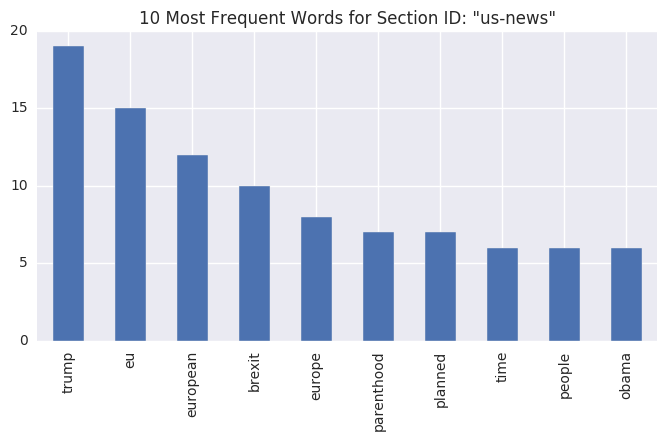

Count :1


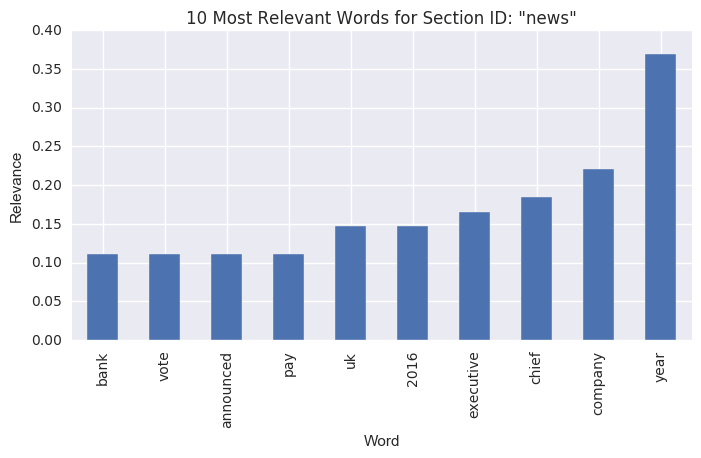

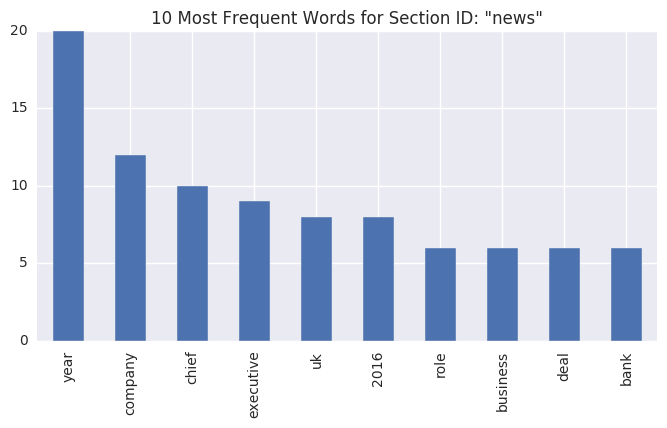

Count :5


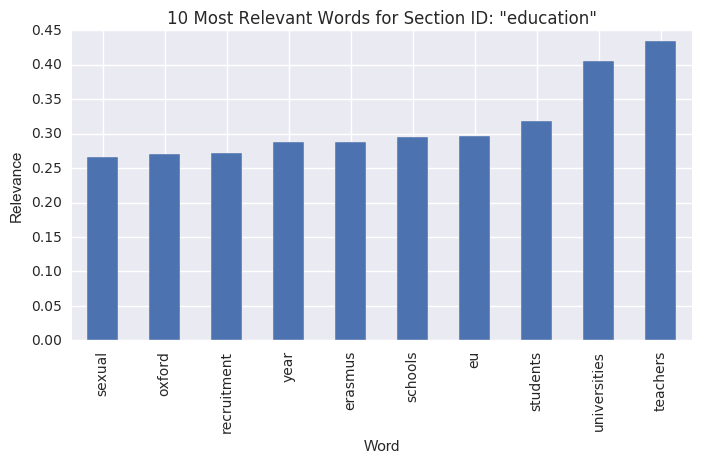

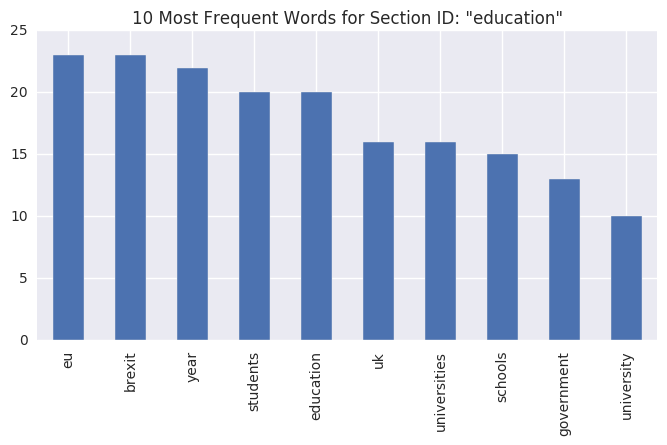

Count :3


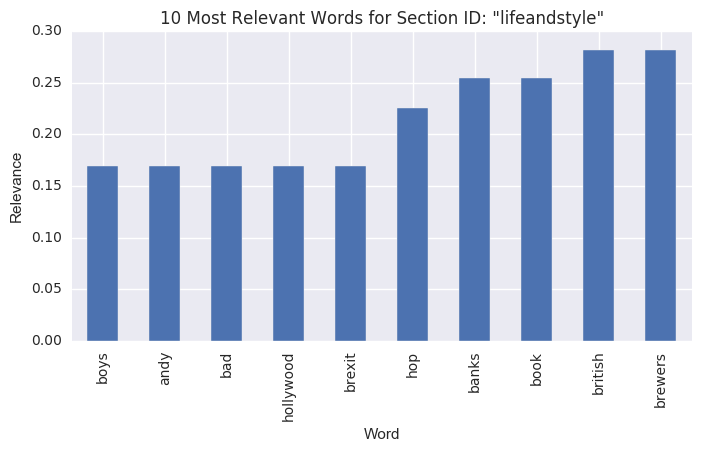

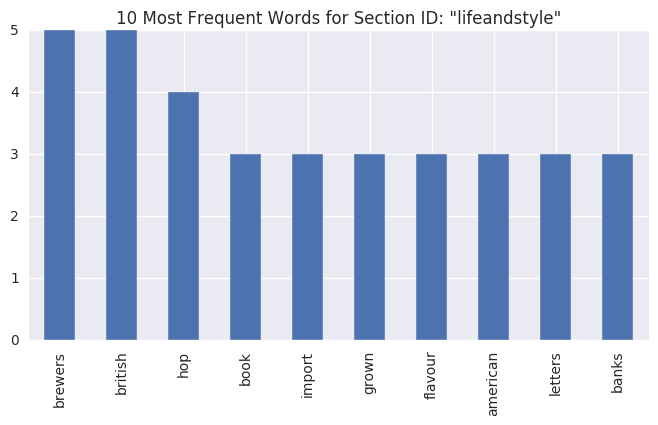

Count :2


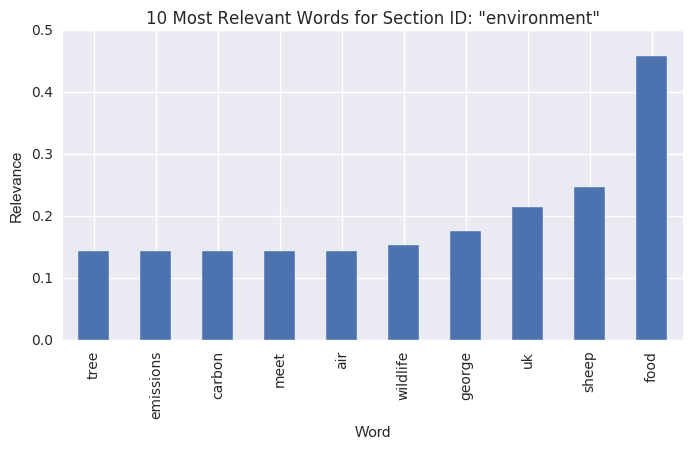

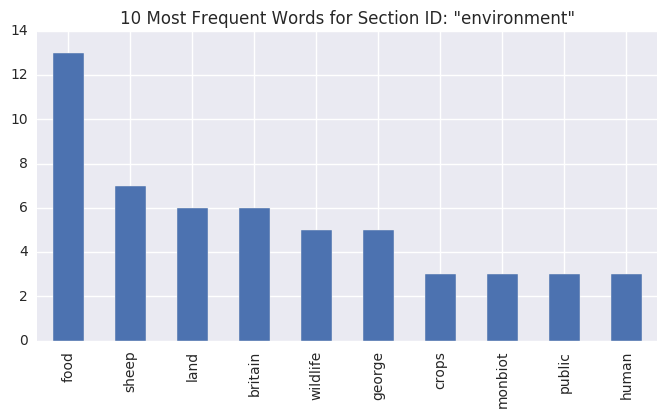

Count :8


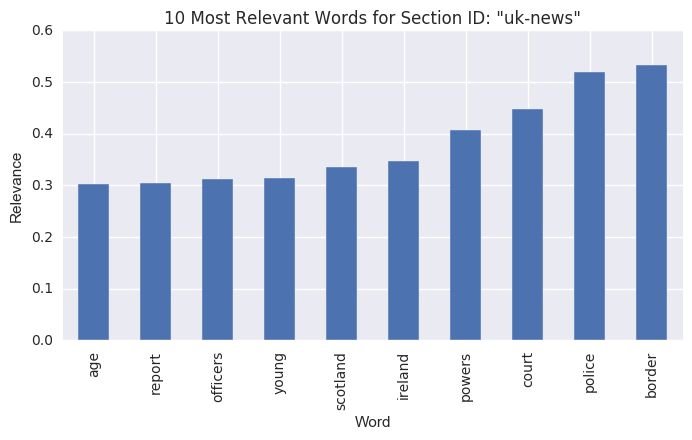

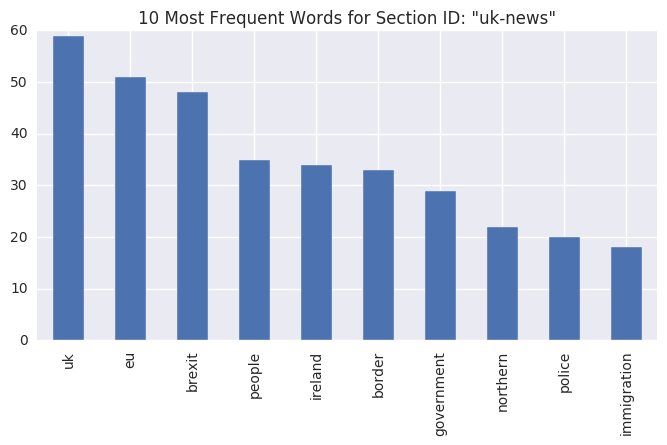

Count :4


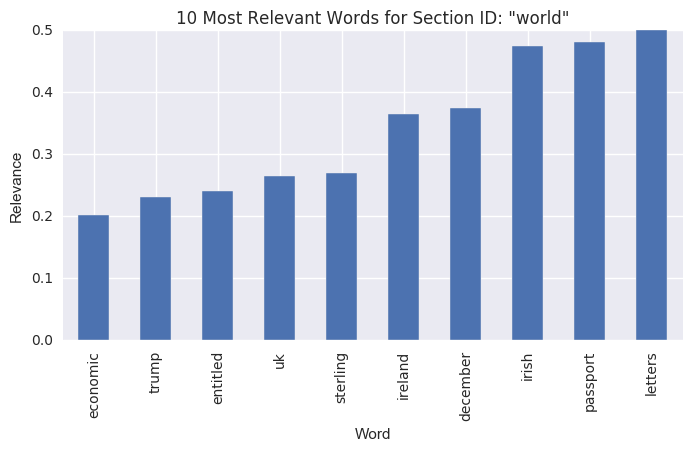

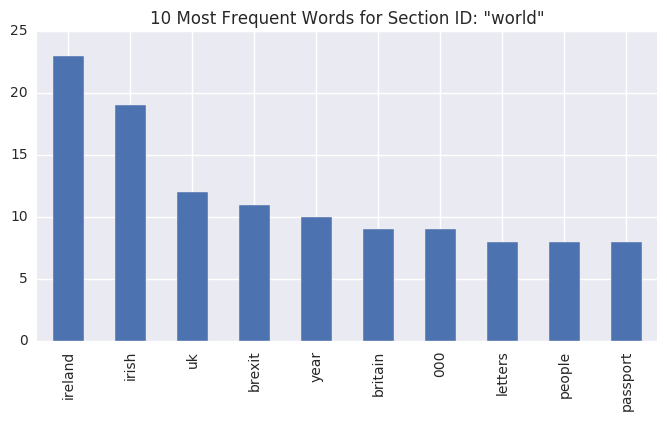

Count :1


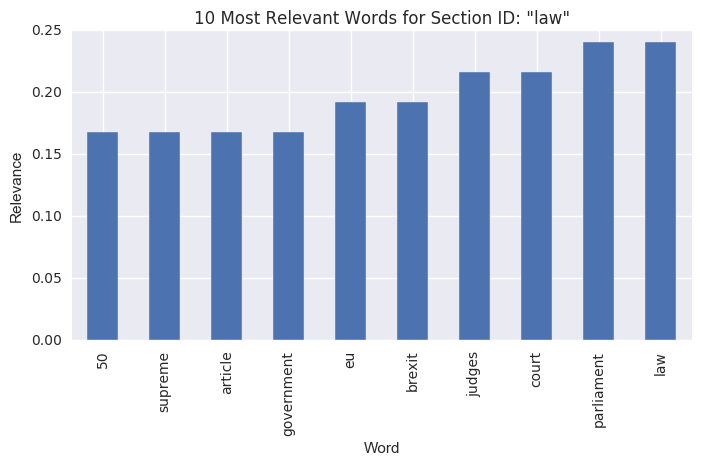

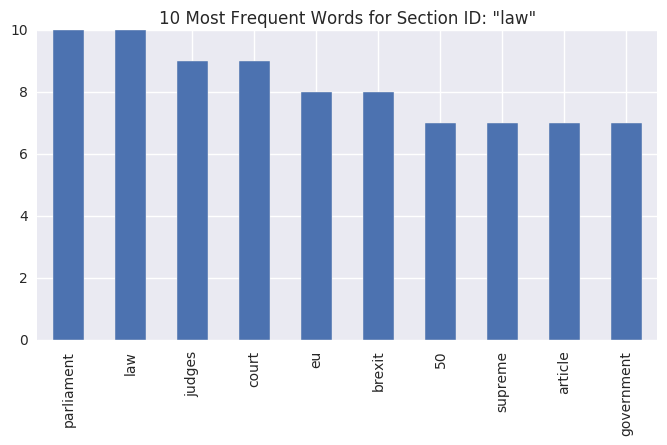

Count :2


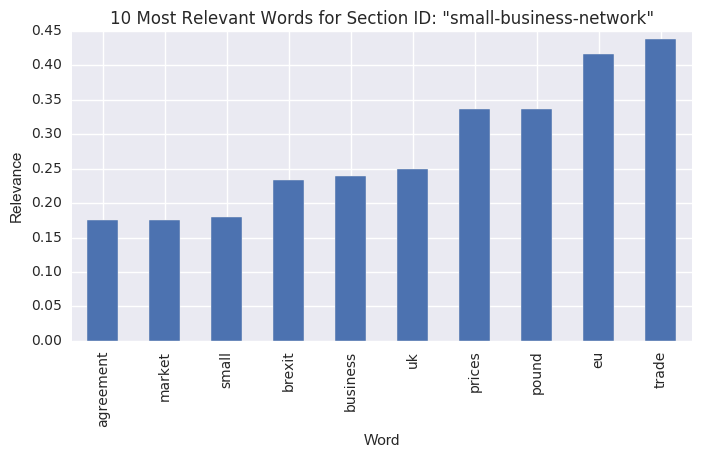

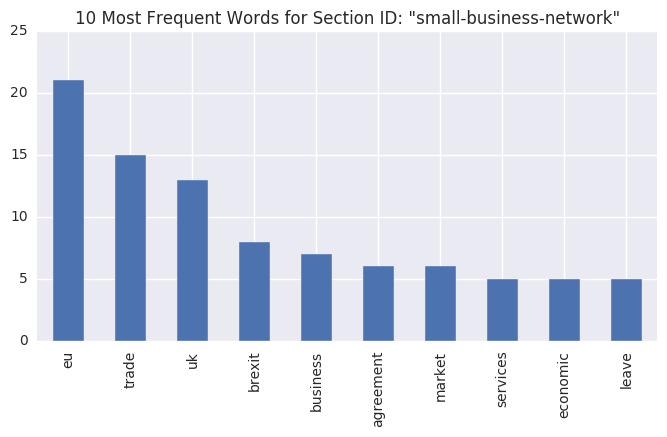

Count :1


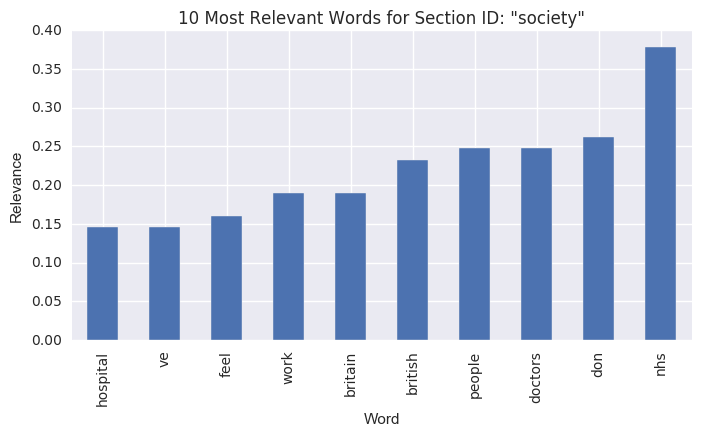

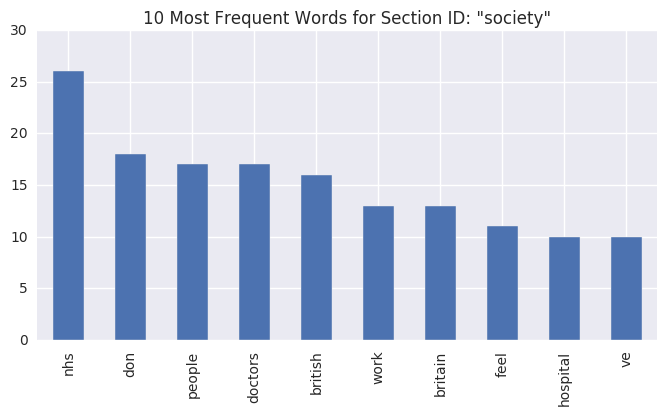

Count :103


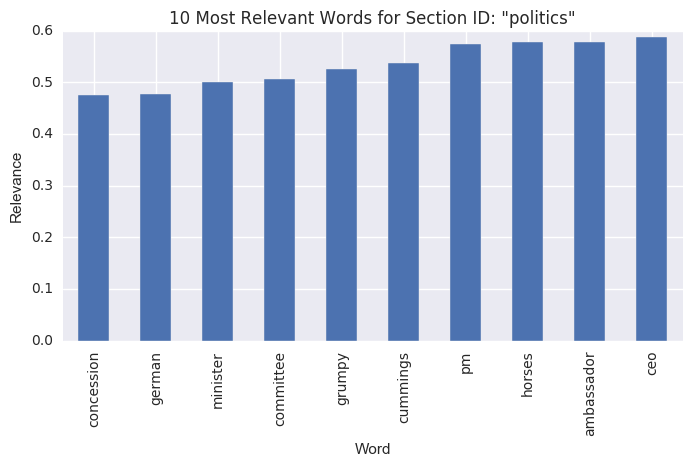

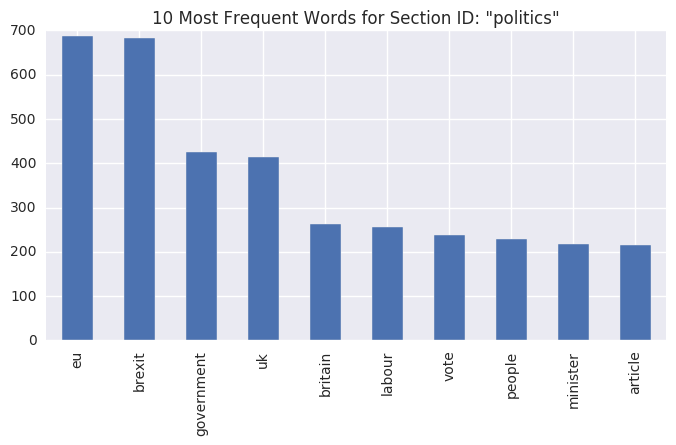

Count :1


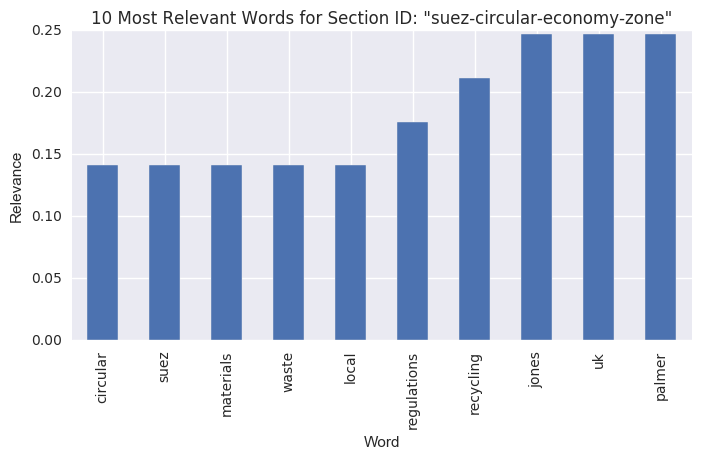

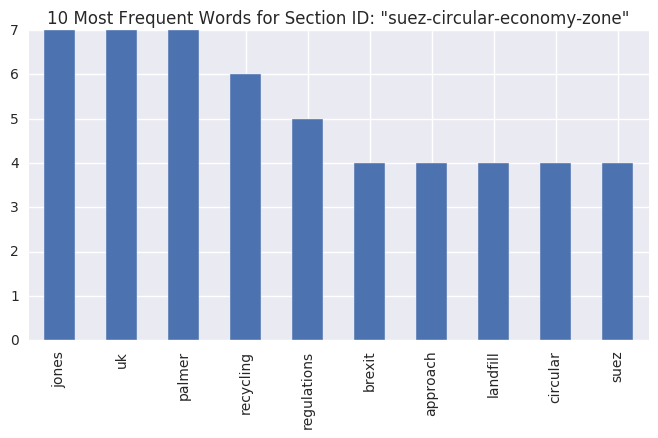

Count :2


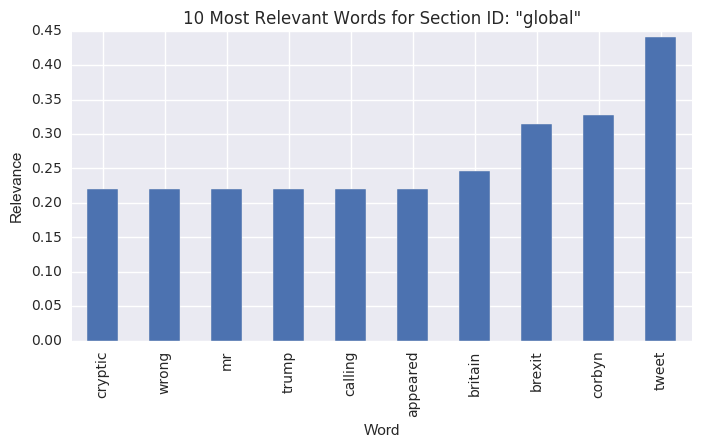

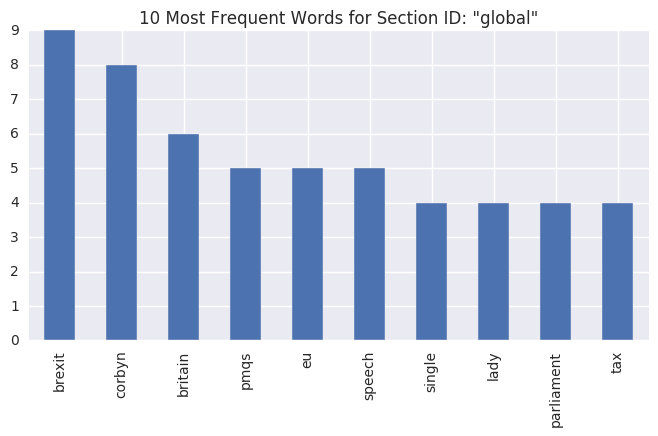

In [240]:
print(words_no_dup)
#words_no_dup1 = ["education","artsanddesign"]
for topic in words_no_dup:
    summaries = []
    count = 0
    for x in articles['response']['results']:
        if x['sectionId']== topic:
            summaries.append(x['blocks']['body'][0]['bodyTextSummary'])
            count+=1
    if(count!= 0 and summaries != ['']):        
        print("Count :"+ str(count))
        tfidf_vect = TfidfVectorizer(stop_words=stopwords)
        tfidf_mat = tfidf_vect.fit_transform(summaries) 
        df = pd.DataFrame(data=tfidf_mat.toarray(),columns=tfidf_vect.get_feature_names())
        df_top_10_tfidf = df.max().sort_values()[-10:]
        axis = df_top_10_tfidf.plot(kind='bar', title="10 Most Relevant Words for Section ID: \"" + topic +"\"")

        count_vect = CountVectorizer(stop_words=stopwords)
        bag = count_vect.fit_transform(summaries)
        summaries_df = pd.DataFrame(data=bag.toarray(),columns=count_vect.get_feature_names())

        axis.set_xlabel("Word")
        axis.set_ylabel("Relevance")
        plt.show()
        summaries_df = summaries_df.sum()
        summaries_df.sort_values(inplace=True)
        largest = summaries_df.nlargest(10)
        largest.plot(kind = "bar", title="10 Most Frequent Words for Section ID: \"" + topic +"\"")
        axis.set_ylabel("Frequency")
        plt.show()


It is interesting how the top 4-5 categories for most target classes are common amongst the 10 Most Relevant Words and the 10 Most Frequent Words, but past the 5th highest, there are different words in both lists. It seems that "info" documents seem to have authors concerned about a "fall" in relation to Brexit and "info" and "fashion" are the only ones with "Brexit" as one of the most frequent or relevant words, surprisingly, considering that our query term was "Brexit". One comical conclusion is that "beer" and "nuclear" are highly relevant for the "business" articles related to Brexit, which might indicate pessimism or fear. Regarding conclusions based off the target class "money", the high frequency and relevancy of the words "confidence" and "growth" indicates that there seems to be a positive economic outlook in articles discussing Brexit. Though this is offset by the presence of "inflation" in the top 5. The most relevant words in the "commentisfree" target class, which is the comment and public opinion site from the Guardian, indicate that the controversial topics in documents containing Brexit are relating to judges, parliament, Ken Clarke, and/or the Labour Party. It is ironic how the top relevant words in the "info" and "business"/"money" classes do not overlap with those in "commentisfree", which either could indicate there is strong factual backing or little debate  regarding positions relating to Brexit such as "growth" and "nuclear". The almost equal relevancy of the terms "remain" or "leave" in Brexit documents about books seems to indicate an equal number of proponents on each side of the argument. Trump being the most frequent word for "us-news" containing Brexit seems to indicate his vocality on the issue.